In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
df = pd.read_csv('survey_results_public.csv')
df.head(4)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0


In [47]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [48]:
cols = ['Country', 'Employment','EdLevel', 'YearsCodePro', 'VersionControlSystem', 'ConvertedCompYearly']
df = df[cols]
df = df.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
df.head(2)

,Country,Employment,EdLevel,YearsCodePro,VersionControlSystem,Salary
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,"Employed, full-time",NaN,NaN,Git,NaN


In [49]:
df = df[df['Salary'].notnull()]
df = df.dropna()
df.isnull().sum()

Country                 0
Employment              0
EdLevel                 0
YearsCodePro            0
VersionControlSystem    0
Salary                  0
dtype: int64

In [50]:
df = df[df['Employment'] == 'Employed, full-time']
df.drop(['Employment'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31353 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               31353 non-null  object 
 1   EdLevel               31353 non-null  object 
 2   YearsCodePro          31353 non-null  object 
 3   VersionControlSystem  31353 non-null  object 
 4   Salary                31353 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [51]:
df['Country'].value_counts()

United States of America                                7852
Germany                                                 2380
United Kingdom of Great Britain and Northern Ireland    2339
India                                                   1865
Canada                                                  1248
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [52]:
def shorten_categories(categories, threshold):
    categerical_map = {}
    for c in range(len(categories)):
        if categories.values[c] >= threshold:
            categerical_map[categories.index[c]] = categories.index[c]
        else:
            categerical_map[categories.index[c]] = 'Other'
    return categerical_map

In [53]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   8635
United States of America                                7852
Germany                                                 2380
United Kingdom of Great Britain and Northern Ireland    2339
India                                                   1865
Canada                                                  1248
France                                                  1123
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    666
Poland                                                   571
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              415
Name: Country, dtype: in

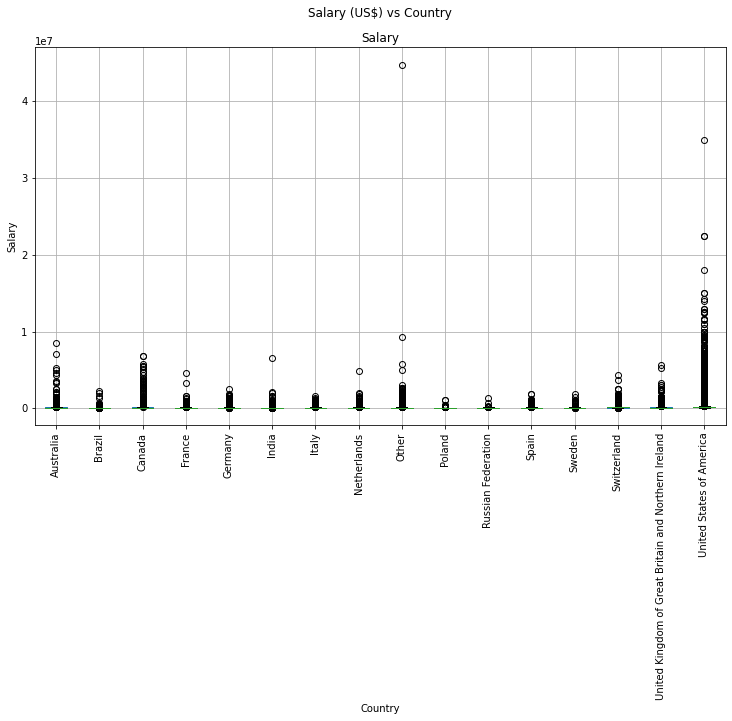

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [55]:
df = df[df['Salary'].isin(range(10000, 400000))]

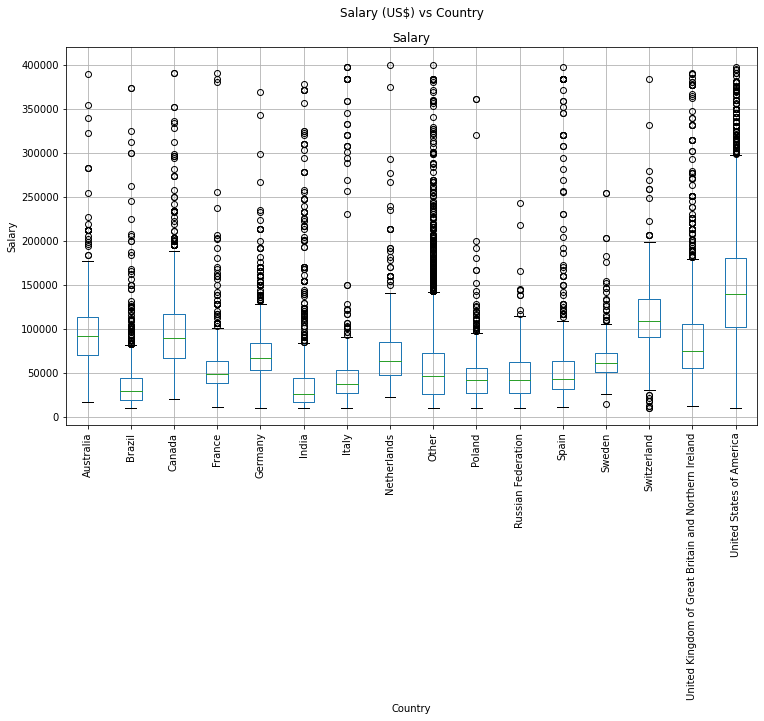

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) vs Country')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [57]:
df['YearsCodePro'].unique()

array(['5', '17', '6', '2', '4', '10', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '40', '27', '28',
       '16', '31', '30', '34', '35', '26', '42', '38', '36', '29', '41',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [58]:
def clean_experience(years):
    if years == 'Less than 1 year':
        return 0.5
    if years == 'More than 50 years':
        return 50
    return float(years)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [59]:
df['EdLevel'].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [60]:
def clean_education(x):
    if "Master’s degree" in x:
        return "Master's degree"
    if "Bachelor’s degree" in x:
        return "Bachelor's degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than Bachelor's"

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [61]:
df['EdLevel'].unique()

array(["Master's degree", "Bachelor's degree", "Less than Bachelor's",
       'Post grad'], dtype=object)

In [62]:
df.drop(['VersionControlSystem'], axis=1, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27752 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       27752 non-null  object 
 1   EdLevel       27752 non-null  object 
 2   YearsCodePro  27752 non-null  float64
 3   Salary        27752 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.1+ MB


In [64]:
from sklearn.preprocessing import LabelEncoder
le_ed = LabelEncoder()
df['EdLevel'] = le_ed.fit_transform(df['EdLevel'])
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])


In [65]:
df['EdLevel'].unique()


array([2, 0, 1, 3])

In [66]:
df['Country'].unique()

array([14,  8,  7, 15,  6,  2,  4,  9,  3,  1, 12, 11,  5, 13,  0, 10])

In [67]:
X, y = df.drop('Salary', axis=1), df['Salary']

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

### Linear Regression

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X, y.values)

lin_pred = lin_reg.predict(X)
lin_err = np.sqrt(mean_squared_error(y, lin_pred))
print(lin_err)

54560.248557269835


#### RandomForest

In [70]:
rf_reg = RandomForestRegressor(random_state=1, n_estimators=170, criterion='poisson', oob_score=True, n_jobs=-1)
rf_reg.fit(X, y.values)
print(f"Params: {rf_reg.get_params}/t/t OOB_Preds: {rf_reg._get_oob_predictions}")

rf_pred = rf_reg.predict(X)

rf_rmse = np.sqrt(mean_squared_error(y, rf_pred))
print("$ {:,.02f}".format(rf_rmse))

Params: <bound method BaseEstimator.get_params of RandomForestRegressor(criterion='poisson', n_estimators=170, n_jobs=-1,
                      oob_score=True, random_state=1)>/t/t OOB_Preds: <function ForestRegressor._get_oob_predictions at 0x7f1e9a6d3250>
$ 45,092.93


In [72]:
import pickle
data = {"model": rf_reg, "le_country":le_country, "le_ed": le_ed}
with open("saved_steps.pkl", "wb") as file:
    pickle.dump(data, file)